# Regression Examples
    
<div class ="alert alert-success">
Task 1
    
Load the dataset 'data/regression_example1.csv'. Try to fit a (linear) regression line for the data set (xdata and ydata columns). Evaluate the quality with the R² score and see how good the regressions fits with the test set (xtest and ytest columns). 

</div>

R^2 data: 0.804
R^2 test: -0.161


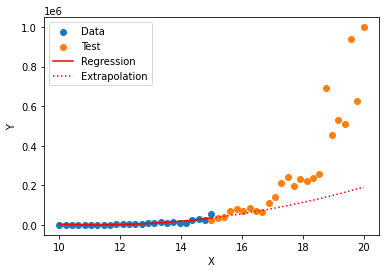

R^2 data: 0.944
R^2 test: 0.937


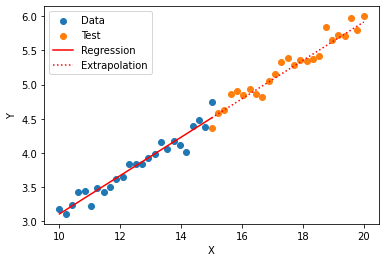

In [4]:
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd


# num.random.seed(0)

# offset = 100
# noise_level = 0.1
# xdata = num.linspace(10, 15, 25)
# ydata = 2 ** xdata #+ num.random.normal(0, noise_level, len(xdata)) + offset

# xtest = num.linspace(15, 20, 25)
# ytest = 2 ** xtest #+ num.random.normal(0, noise_level, len(xtest)) + offset

# ydata = num.log10(ydata)  + num.random.normal(0, noise_level, len(xdata))
# ytest = num.log10(ytest)  + num.random.normal(0, noise_level, len(xdata))

# ydata = 10 ** ydata
# ytest = 10 ** ytest

# df = pd.DataFrame()
# df['xdata'] = xdata
# df['ydata'] = ydata
# df['xtest'] = xtest
# df['ytest'] = ytest

# # print(df)
# df.to_csv('data/regression_example1.csv')

df = pd.read_csv('data/regression_example1.csv')
xdata = df['xdata']
ydata = df['ydata']
xtest = df['xtest']
ytest = df['ytest']

#### Default approach
order = 2
coeff, residuals, _, _, _ = num.polyfit(xdata, ydata, order, full=True)
residuals = residuals[0]

model = num.poly1d(coeff)
yregr = model(xdata)
yregr2 = model(xtest)

denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals / denominator)
print('R^2 data: %.3f' % r2)

residuals = sum((ytest - yregr2) ** 2)
denominator = sum((ytest - num.mean(ytest)) ** 2)
r2_test = 1 - (residuals / denominator)
print('R^2 test: %.3f' % r2_test)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.plot(xtest, yregr2, color='red', linestyle=':', label='Extrapolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#### Log-approach
ydata = num.log10(ydata)
ytest = num.log10(ytest)

order = 1
coeff, residuals, _, _, _ = num.polyfit(xdata, ydata, order, full=True)
residuals = residuals[0]

model = num.poly1d(coeff)
yregr = model(xdata)
yregr2 = model(xtest)

denominator = sum((ydata - num.mean(ydata)) ** 2)
r2 = 1 - (residuals / denominator)
print('R^2 data: %.3f' % r2)

residuals = sum((ytest - yregr2) ** 2)
denominator = sum((ytest - num.mean(ytest)) ** 2)
r2_test = 1 - (residuals / denominator)
print('R^2 test: %.3f' % r2_test)

plt.figure()
plt.scatter(xdata, ydata, label='Data')
plt.scatter(xtest, ytest, label='Test')
plt.plot(xdata, yregr, color='red', label='Regression')
plt.plot(xtest, yregr2, color='red', linestyle=':', label='Extrapolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<div class ="alert alert-success">
Task 2
    
Load the dataset 'data/regression_example2.csv'. It is a dataset 'of common fish species for fish market'. Try to fit a multiple linear regression for the 'Weight' column. Evaluate the quality with the R² score and see how good the regressions fits with a self-defined test set. 

Addtional: Try different models that might make sense from the scikit-learn module.


https://www.kaggle.com/datasets/aungpyaeap/fish-market

https://www.kaggle.com/code/sreelalh/fish-weight-prediction
</div>

   Species  Weight  Length1  Length2  Length3   Height   Width
0    Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1    Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3    Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4    Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5    Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6    Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7    Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8    Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9    Bream   500.0     28.5     30.7     36.2  14.2266  4.9594
10   Bream   475.0     28.4     31.0     36.2  14.2628  5.1042
11   Bream   500.0     28.7     31.0     36.2  14.3714  4.8146
12   Bream   500.0     29.1     31.5     36.4  13.7592  4.3680
13   Bream   340.0     29.5     32.0     37.3  13.9129  5.0728
14   Bream   600.0     29.4     32.0     37.2  14.9544 

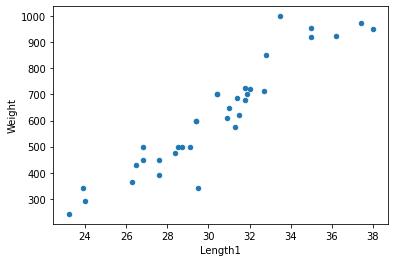

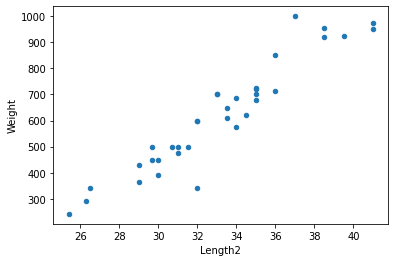

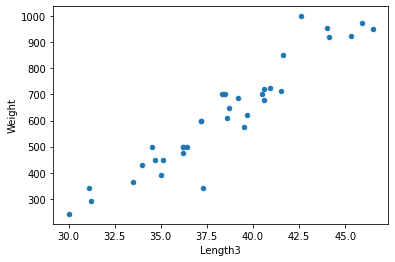

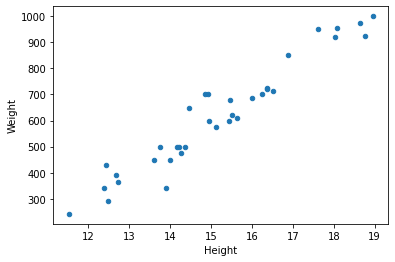

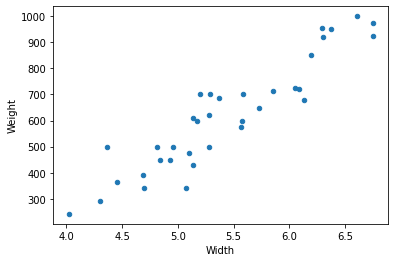

In [33]:
import numpy as num
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df = df[df['Species'] == 'Bream']

inputcols = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
outputcols = ['Weight']
xdata = df[inputcols]
ydata = df[outputcols]
print(df)
print(xdata)
print(ydata)

# Importing Linear Regression Model from scikit-learn
from sklearn.linear_model import LinearRegression

# Initializing the model/ Create python object
model = LinearRegression()

model.fit(xdata, ydata)

r_sq = model.score(xdata, ydata)
print('Train-R² :', r_sq)
print('Intercept:', model.intercept_)
print('Slope    :', model.coef_)


for col in inputcols: 
    df.plot(x=col, y=outputcols[0], kind='scatter')
# plt.figure()
# for icol in inputcols:
# #     plt.plot(list(xdata[icol]), ydata[outputcols])
#     plt.plot(xdata, ydata)
# plt.show()